# Reference genome testing - Merging

<div class="alert alert-warning">
    
**What the fourth section (Merging and Clustering) does**
    
This section merges the different datasets and visualizes the merged data. The section contains the following subsections:

* Merging <br>
* Alignment parameter visualization <br>
</div>

In [3]:
#old (ensemble 93)
old_processed = '/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_reference_testing/data/CNR0176487_old_processed.h5ad' 

#new (ensemble 98)
new_processed = '/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_reference_testing/data/CNR0176487_new_processed.h5ad' 


In [4]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/0_reference_testing/data')

In [5]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_reference_testing/data'

In [6]:
!ls

CNR0176487_new_filtered_1.h5ad	  CNR0176487_old_preprocessed.h5ad
CNR0176487_new_preprocessed.h5ad  CNR0176487_old_processed.h5ad
CNR0176487_new_processed.h5ad	  CNR01764_reg_processed.h5ad
CNR0176487_old_filtered_1.h5ad	  figures


In [7]:
files = [old_processed, new_processed]

In [8]:
names = [name.split('_processed')[0].split('/data/')[1] for name in files ]
print(names)

['CNR0176487_old', 'CNR0176487_new']


In [9]:
object_names_processed=list()
numberobj = len(files)

for i in range(numberobj):
    object_names_processed.append("adata"+"_"+names[i]+"_"+"processed")
    locals()[object_names_processed[i]] = sc.read(files[i]) 
    print(object_names_processed[i],' is loaded')

adata_CNR0176487_old_processed  is loaded
adata_CNR0176487_new_processed  is loaded


In [10]:
locals()[object_names_processed[0]]

AnnData object with n_obs × n_vars = 5300 × 31040
    obs: 'species', 'gender', 'age', 'cngb_sample_id', 'sample_name', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts_no_mito', 'total_counts_norm'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Add dataset annotation

In [11]:
refs = ['Ensemble 93', 'Ensemble 98']
for i in range(numberobj):
    locals()[object_names_processed[i]].obs['ref'] = refs[i]
    

In [12]:
adata_merge = ad.concat([adata_CNR0176487_old_processed,adata_CNR0176487_new_processed],  join="outer")
adata_merge.obs_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


pca again

In [37]:
sc.tl.pca(adata_merge, svd_solver='arpack')
#    sc.tl.pca(locals()[object_names_reg[i]], svd_solver='arpack')

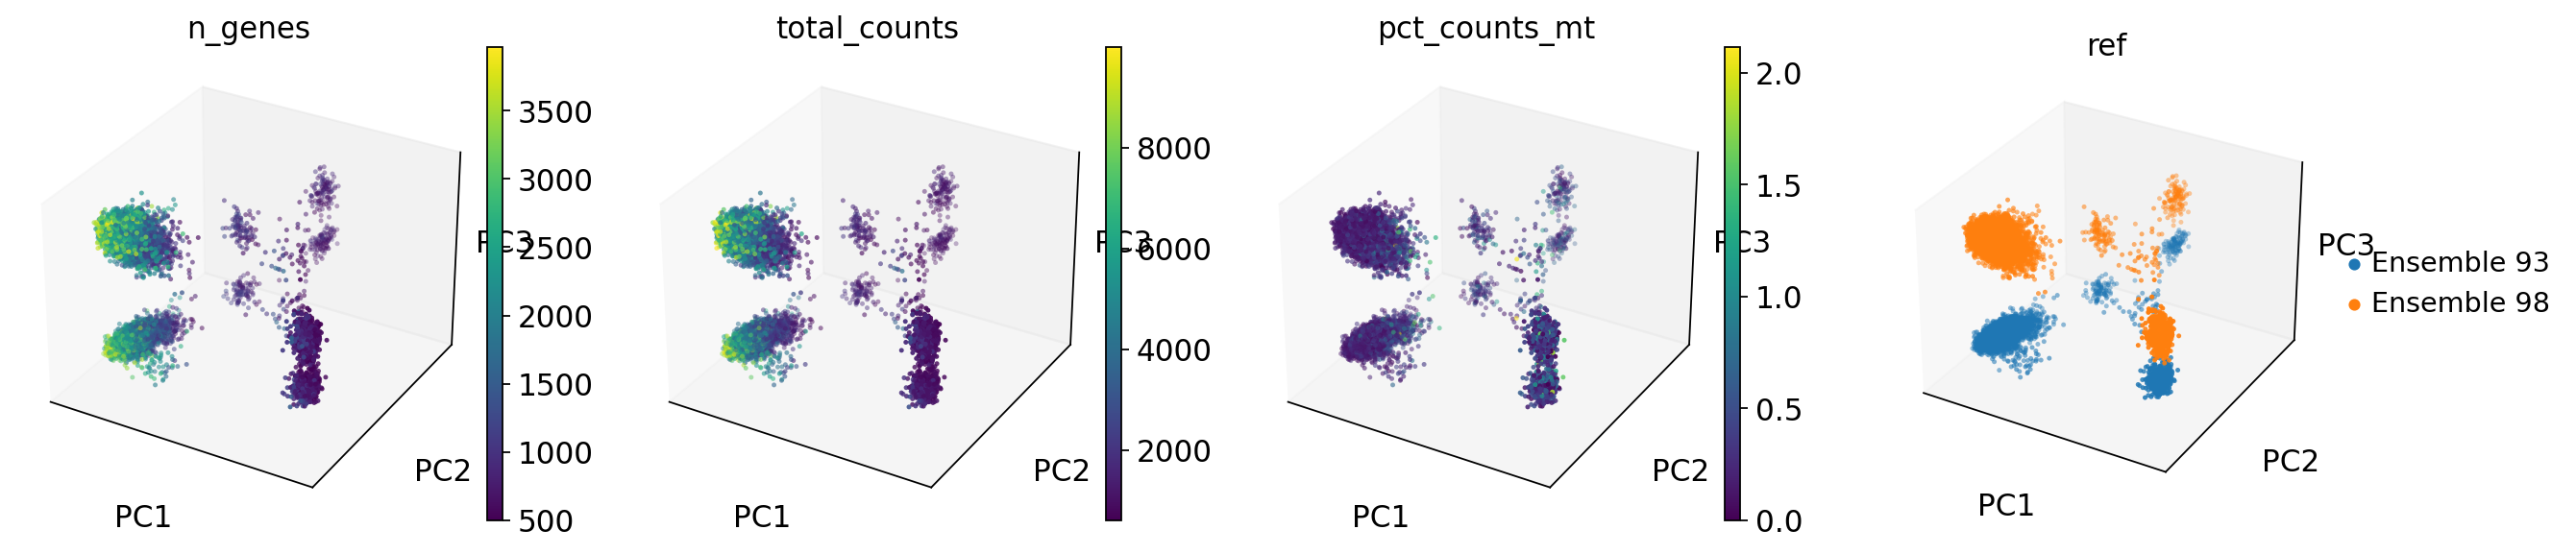

In [198]:
sc.pl.pca(adata_merge, color=['n_genes', 'total_counts', 'pct_counts_mt', 'ref'], projection ='3d') #save = "_merge_pca_1.pdf")
#    sc.pl.pca(locals()[object_names_reg[i]], color=['n_genes', 'total_counts', 'pct_counts_mt'], save = "_"+object_names_reg[i]+"_intron_metrics_1.pdf")


In [38]:
nn= 15 #default 15
sc.pp.neighbors(adata_merge, n_neighbors=nn, n_pcs=40)
sc.tl.umap(adata_merge)

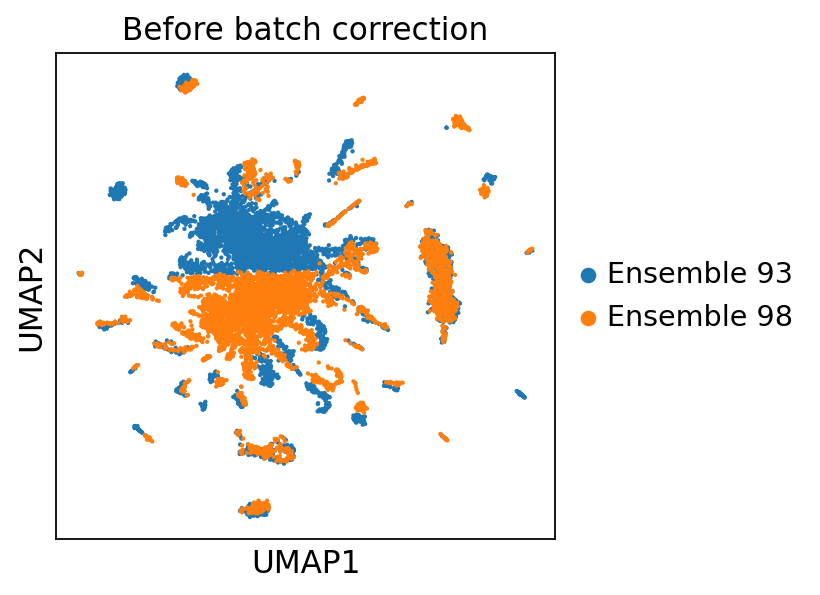

In [39]:
sc.pl.umap(adata_merge,color=['ref'], wspace=0.4,s=15, title='Before batch correction')

In [276]:
adata_merge

AnnData object with n_obs × n_vars = 10608 × 33489
    obs: 'species', 'gender', 'age', 'cngb_sample_id', 'sample_name', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts_no_mito', 'total_counts_norm', 'ref'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

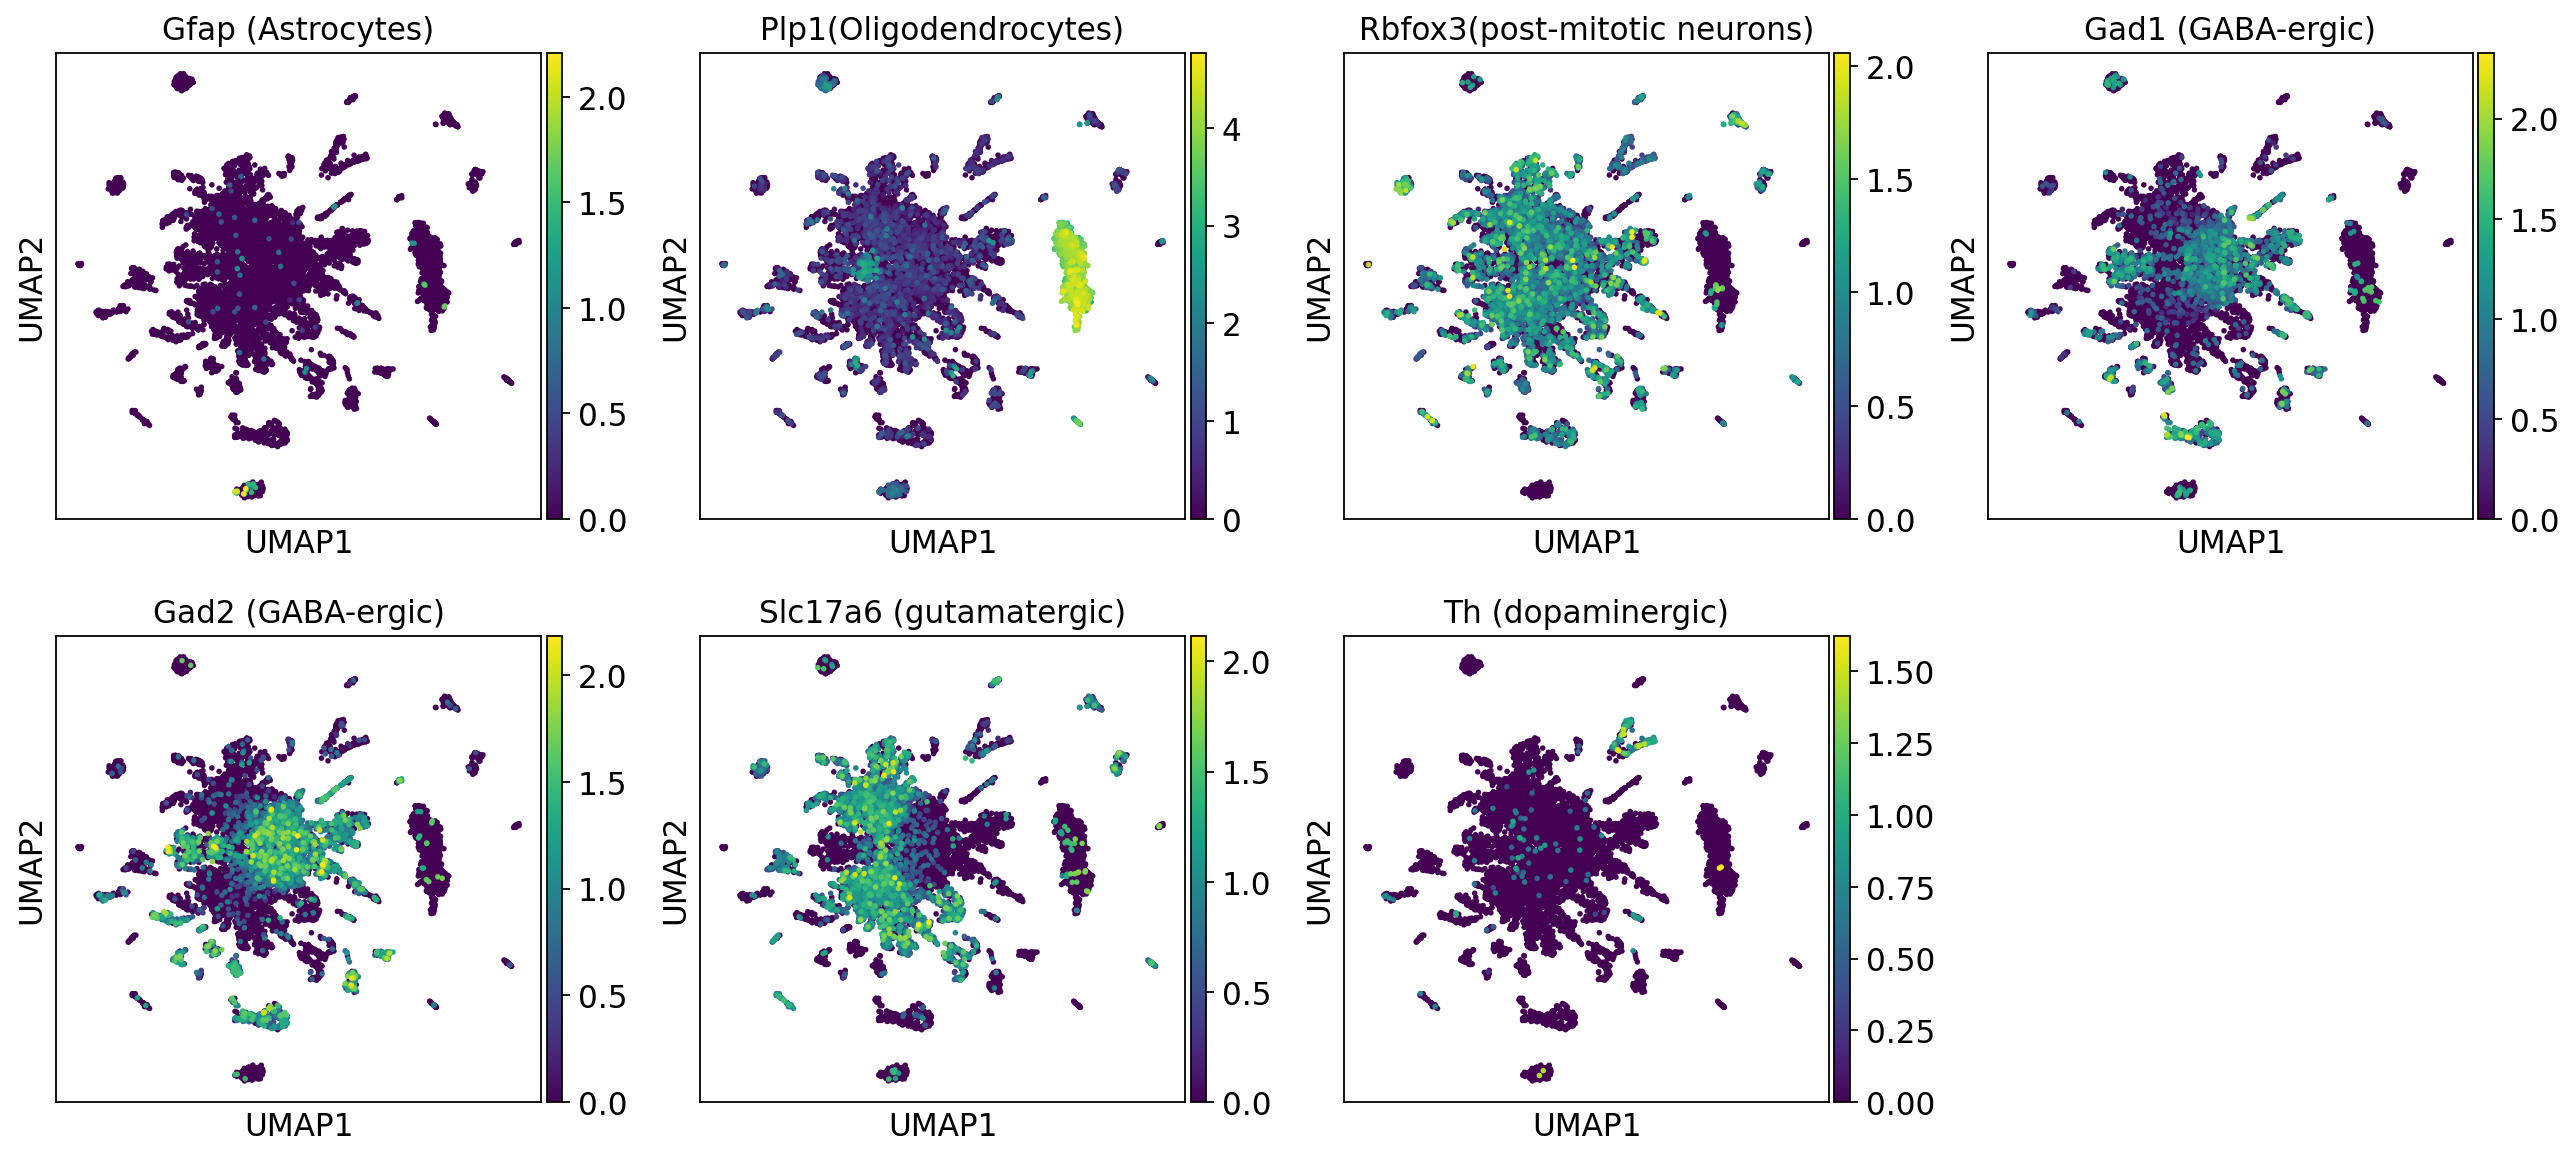

In [40]:

    if adata_merge.obs['species'][0] == 'Homo sapien':
        sc.pl.umap(adata_merge, color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'TH','SLC17A6'], use_raw=True, s=25,
           save = "merge_umap_n"+str(nn)+"_2.pdf")
    else:
        sc.pl.umap(adata_merge, color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2', 'Slc17a6','Th'],title=['Gfap (Astrocytes)', 'Plp1(Oligodendrocytes)', 'Rbfox3(post-mitotic neurons)', 'Gad1 (GABA-ergic)','Gad2 (GABA-ergic)', 'Slc17a6 (gutamatergic)', 'Th (dopaminergic)'], use_raw=False, s=25,save = "_merge_umap_n"+str(nn)+"_2.pdf")

rescaling

In [54]:
adata_merge_rb = adata_merge.copy()

In [50]:
sc.tl.pca(adata_merge_rb, svd_solver='arpack')

In [51]:
sc.external.pp.harmony_integrate(adata_merge_rb, key =['ref'])

2023-03-23 00:51:02,566 - harmonypy - INFO - Iteration 1 of 10
2023-03-23 00:51:06,050 - harmonypy - INFO - Iteration 2 of 10
2023-03-23 00:51:09,423 - harmonypy - INFO - Iteration 3 of 10
2023-03-23 00:51:12,783 - harmonypy - INFO - Iteration 4 of 10
2023-03-23 00:51:16,020 - harmonypy - INFO - Iteration 5 of 10
2023-03-23 00:51:19,223 - harmonypy - INFO - Iteration 6 of 10
2023-03-23 00:51:20,431 - harmonypy - INFO - Converged after 6 iterations


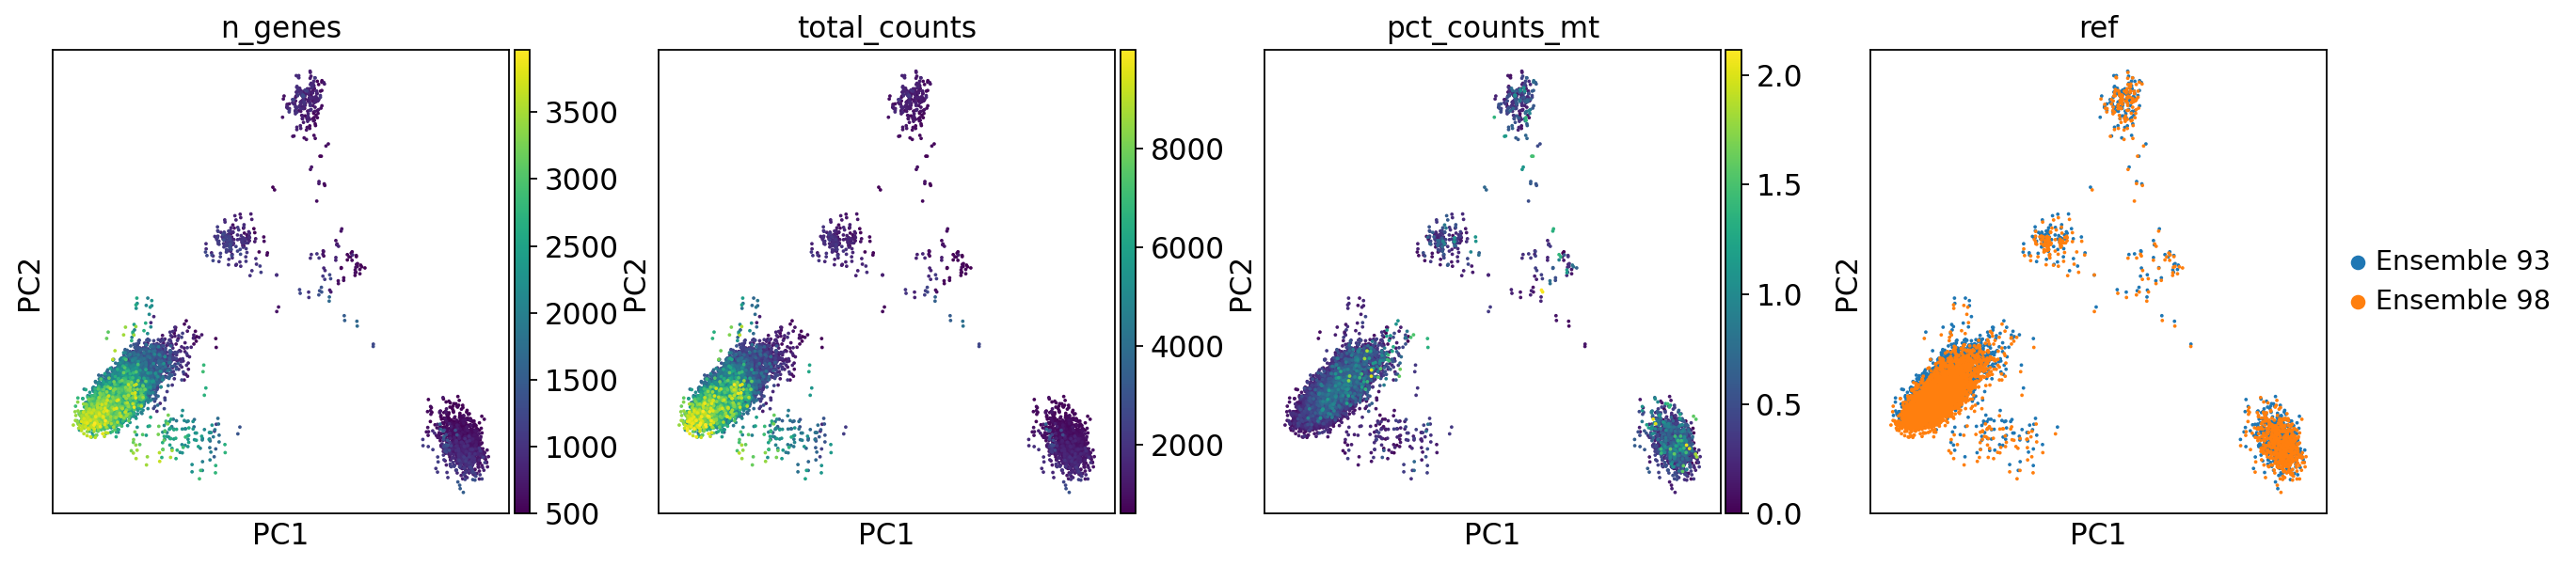

In [201]:
sc.pl.pca(adata_merge, color=['n_genes', 'total_counts', 'pct_counts_mt', 'ref'], save = "_merge_pca_1.pdf")
#    sc.pl.pca(locals()[object_names_reg[i]], color=['n_genes', 'total_counts', 'pct_counts_mt'], save = "_"+object_names_reg[i]+"_intron_metrics_1.pdf")


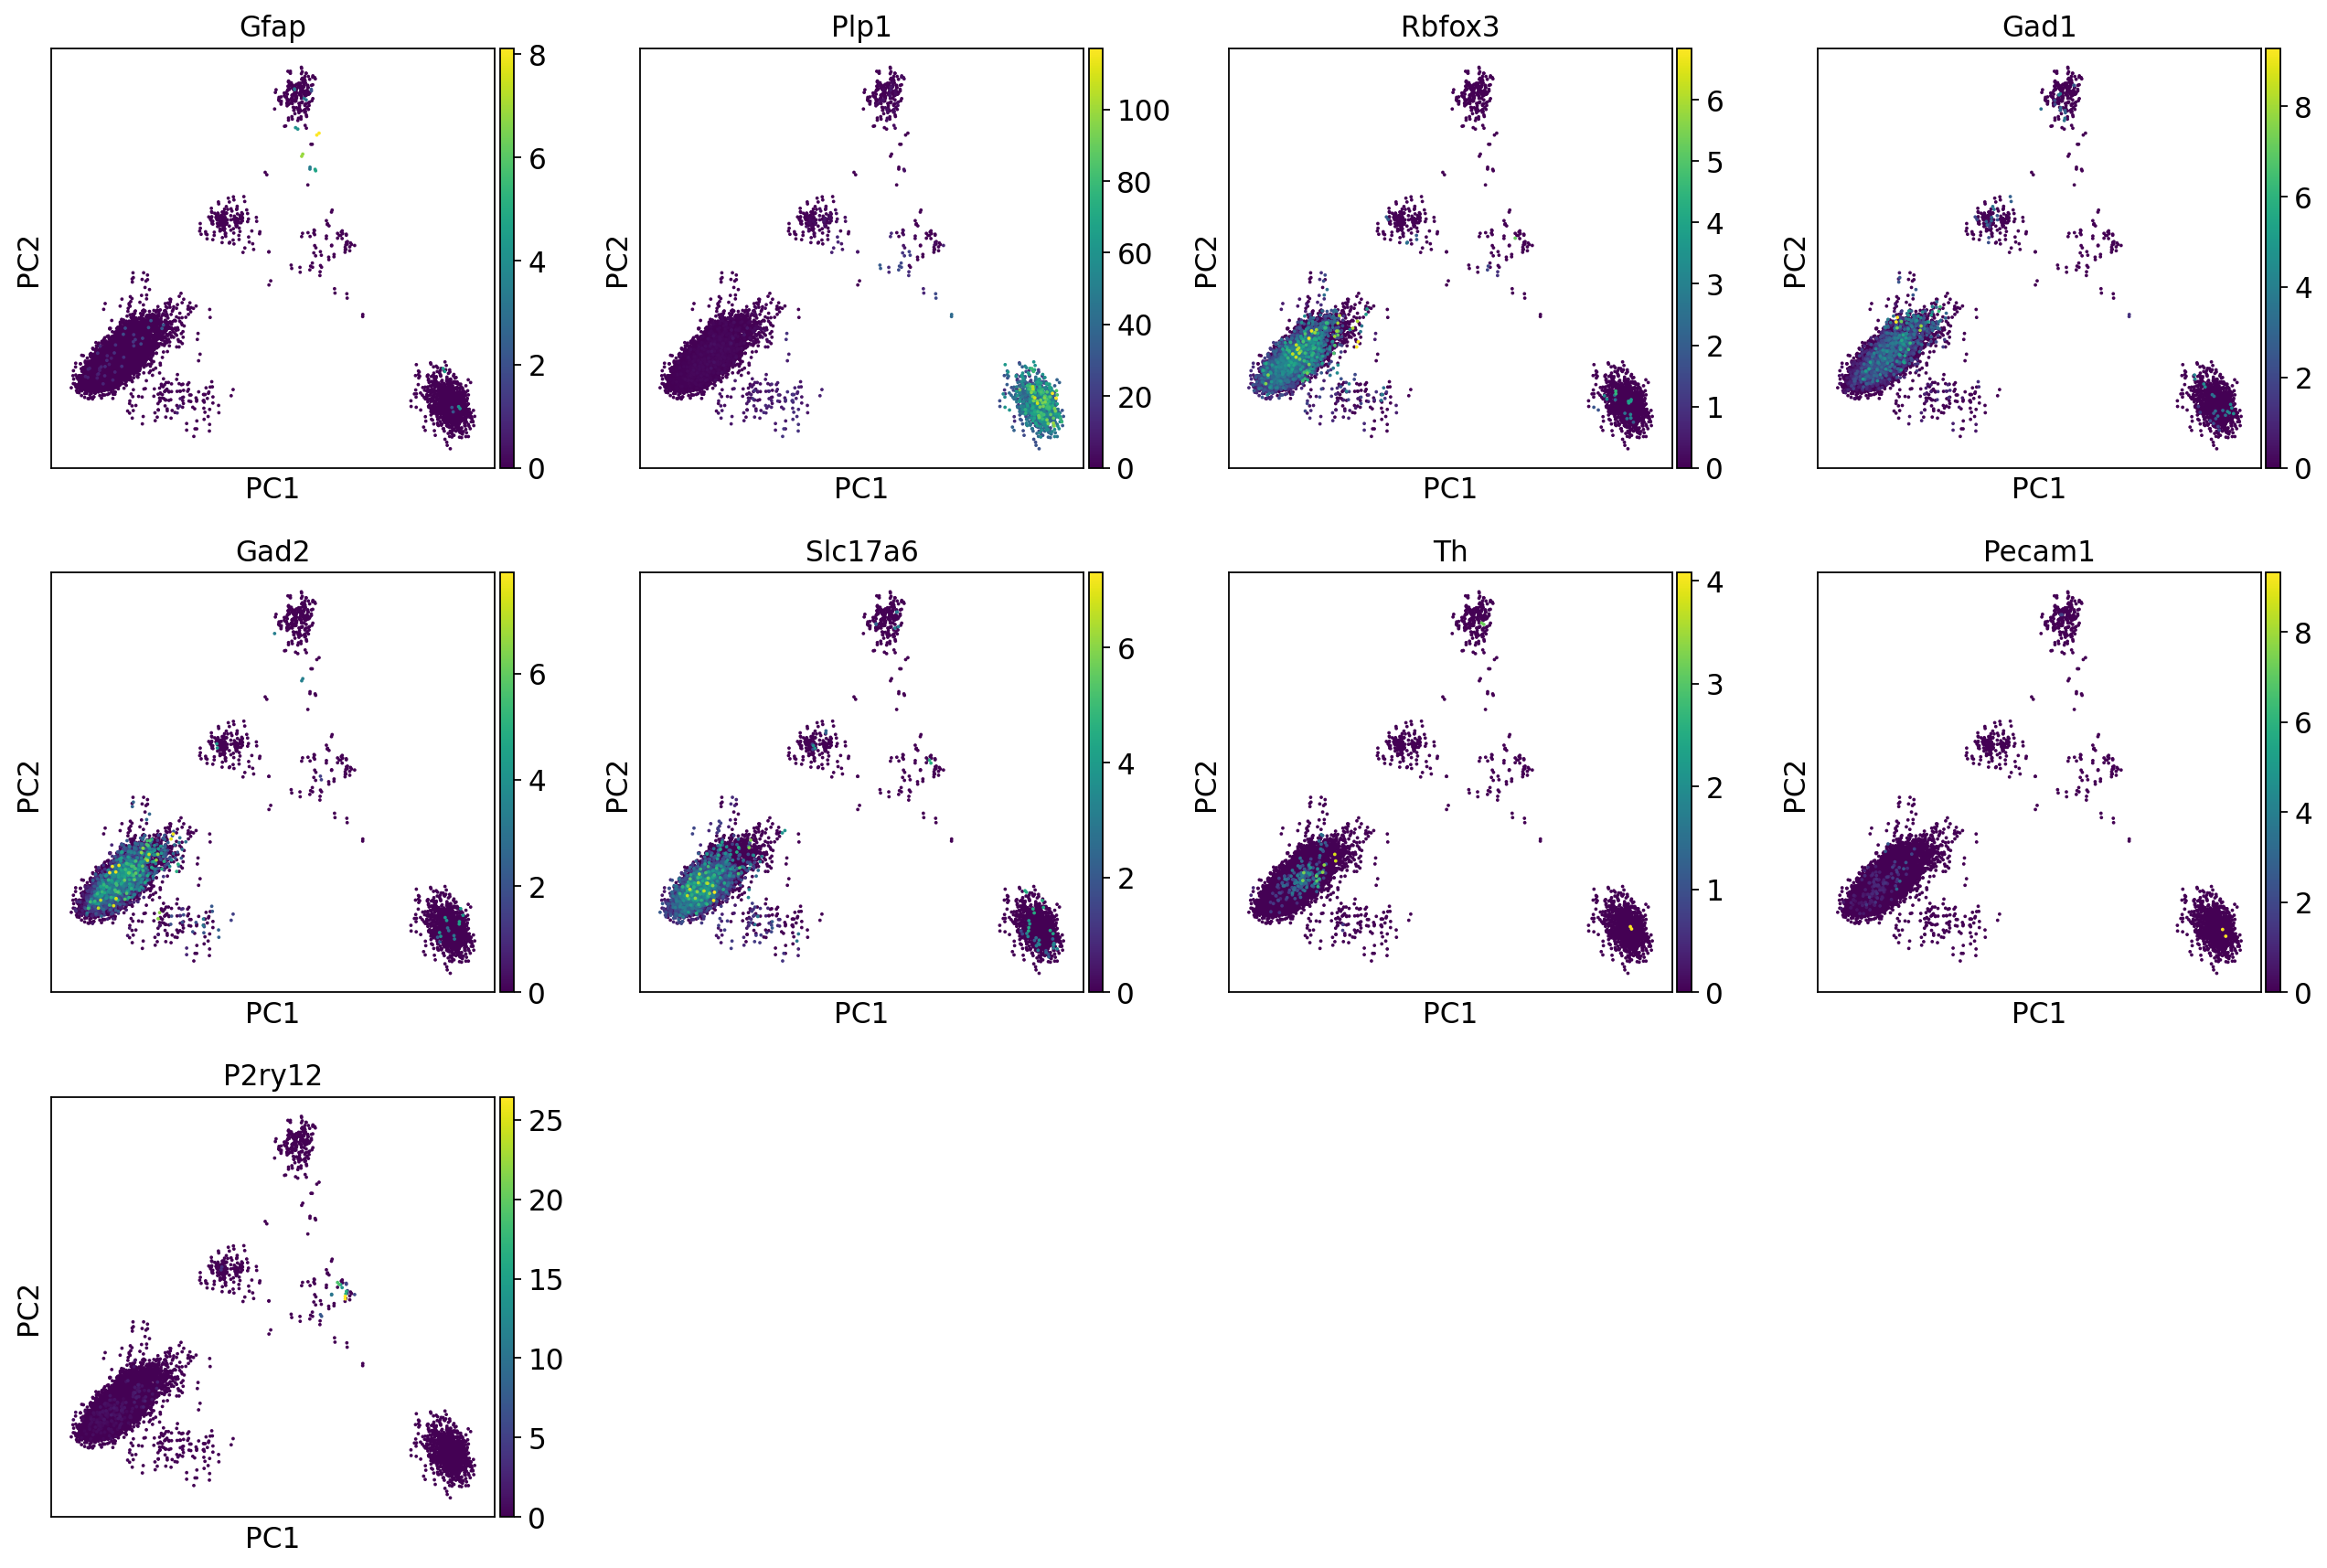

In [231]:
sc.pl.pca(adata_merge_rb, color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2','Slc17a6','Th','Pecam1','P2ry12' ])

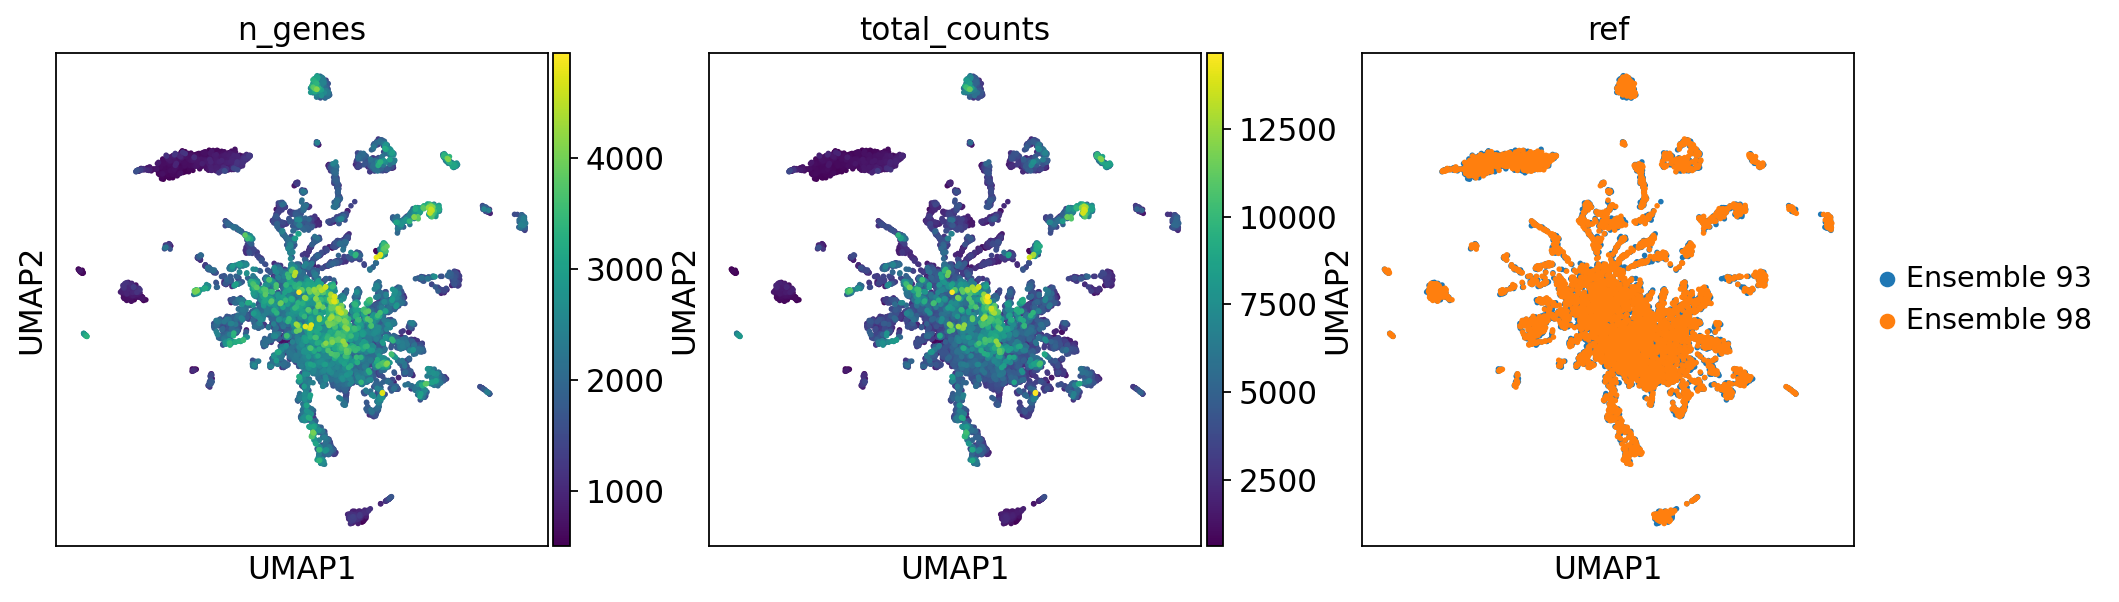

In [52]:
sc.pp.neighbors(adata_merge_rb, n_neighbors=nn, n_pcs=40,use_rep='X_pca_harmony')
sc.tl.umap(adata_merge_rb)
sc.pl.umap(adata_merge_rb, color=['n_genes', 'total_counts','ref'], 
           use_raw=False, s=25,save = '_merge_batch_rb_1.pdf')

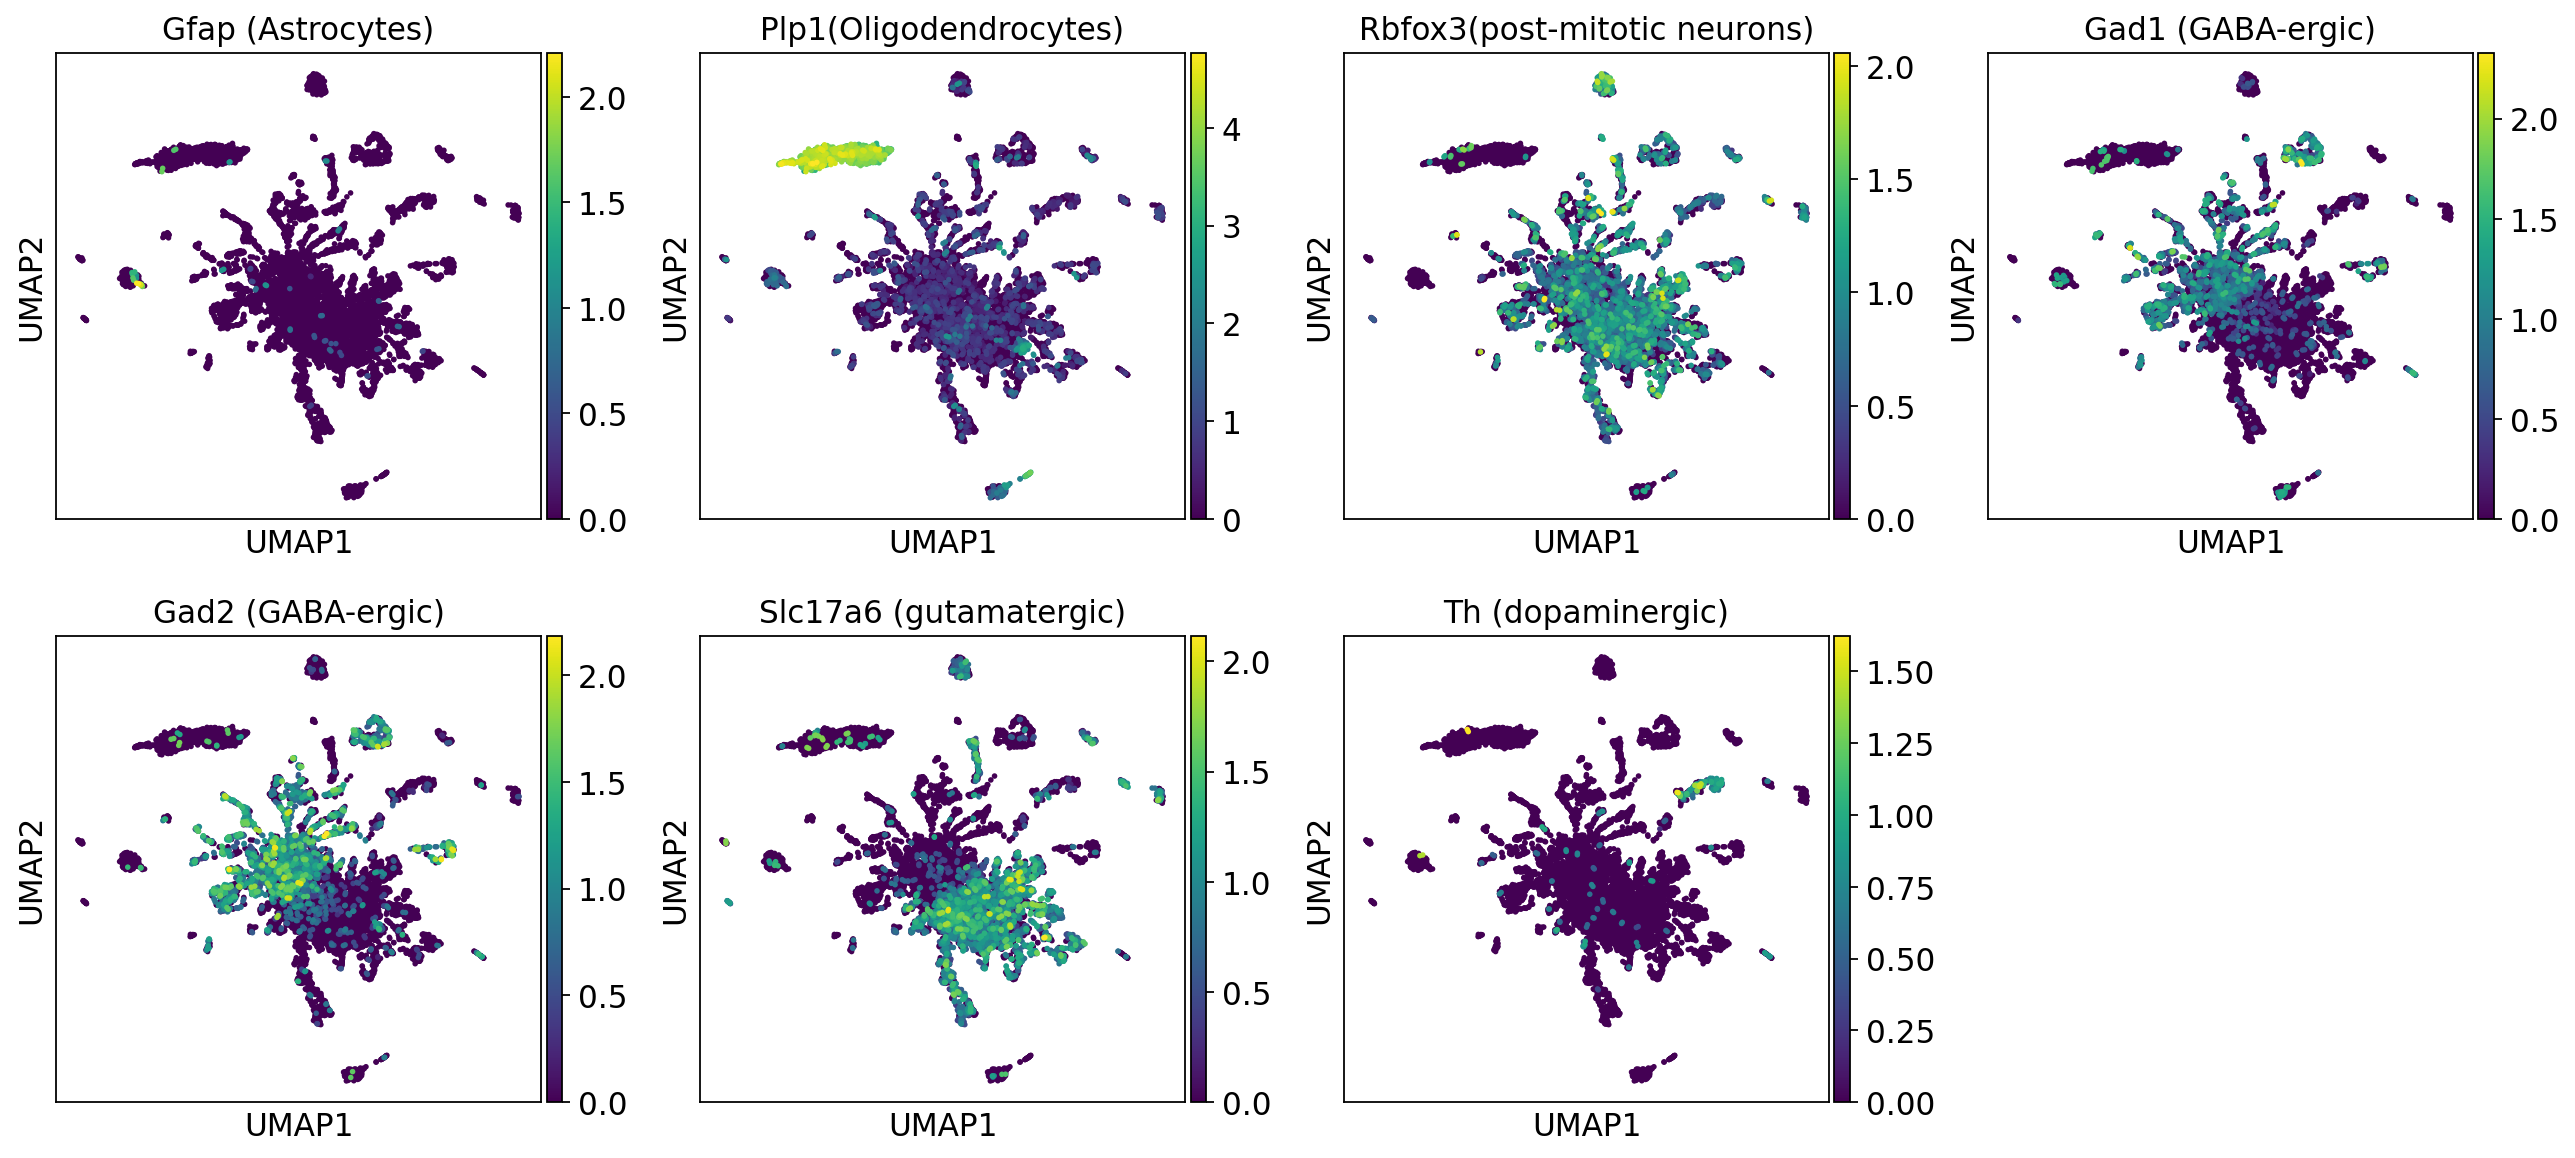

In [53]:

sc.pl.umap(adata_merge_rb, color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2', 'Slc17a6','Th'],title=['Gfap (Astrocytes)', 'Plp1(Oligodendrocytes)', 'Rbfox3(post-mitotic neurons)', 'Gad1 (GABA-ergic)','Gad2 (GABA-ergic)', 'Slc17a6 (gutamatergic)', 'Th (dopaminergic)'], use_raw=False, s=25)
   #save = "_merge_umap_n"+str(nn)+"_2.pdf")

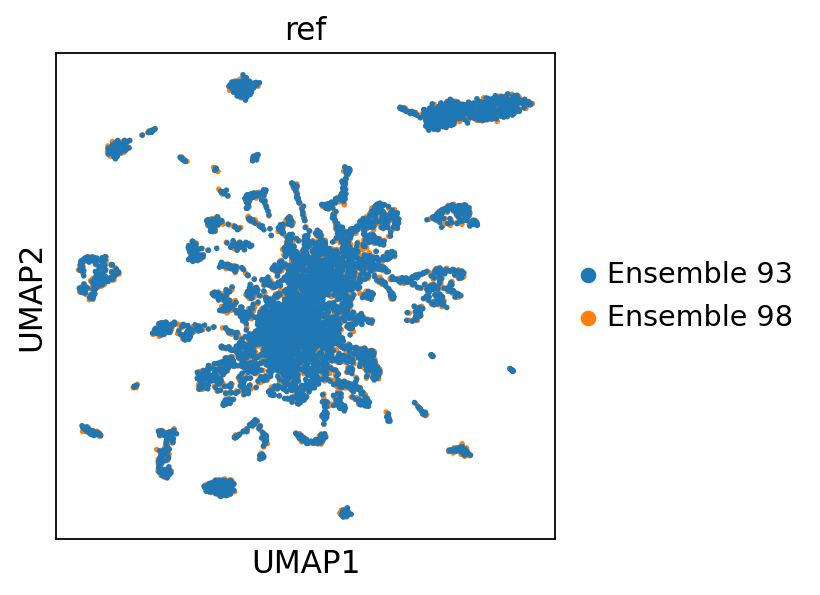

In [234]:
sorted_adata_merge_rb = adata_merge_rb[adata_merge_rb.obs.sort_values('ref', ascending = False).index]
sc.pl.umap(sorted_adata_merge_rb, color=['ref'], use_raw=False, s=25)

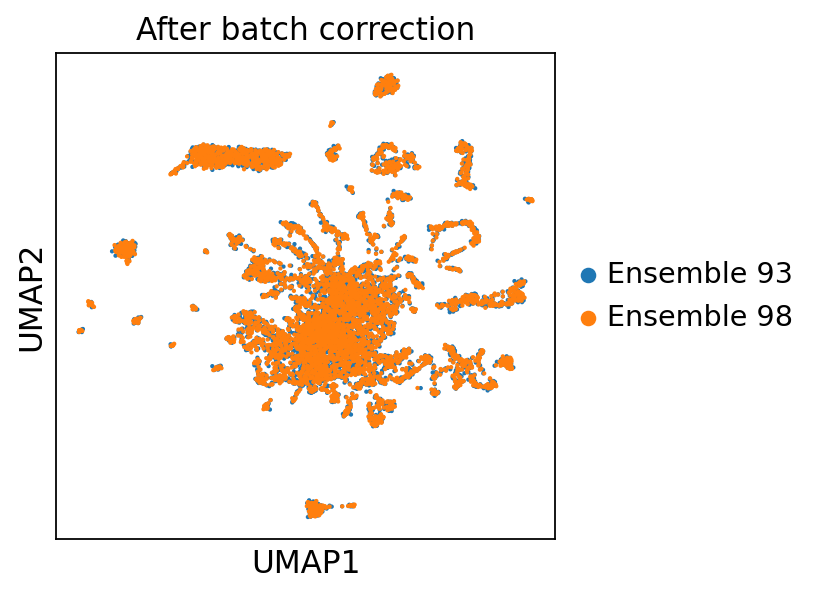

In [44]:
sc.pl.umap(adata_merge_rb, color=['ref'], use_raw=False, s=15,title='After batch correction')

In [170]:
!ls

CNR0176487_new_filtered_1.h5ad	  CNR0176487_old_preprocessed.h5ad
CNR0176487_new_preprocessed.h5ad  CNR0176487_old_processed.h5ad
CNR0176487_new_processed.h5ad	  CNR01764_reg_processed.h5ad
CNR0176487_old_filtered_1.h5ad	  figures


In [171]:
min_counts = 500 #default
max_counts = 10000 #filters out none, maybe 15k later
min_genes = 500
max_genes = 4000
min_cells = 3



for i in range(numberobj):
    adata_merge = adata_merge[adata_merge.obs['total_counts']>=min_counts]
    adata_merge = adata_merge[adata_merge.obs['total_counts'] < max_counts ]
    adata_merge = adata_merge[adata_merge.obs['n_genes'] >= min_genes]
    adata_merge = adata_merge[adata_merge.obs['n_genes'] < max_genes]
    
    sc.pp.filter_genes(adata_merge, min_cells=min_cells)

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [172]:
adata_merge_test = adata_merge.copy()

In [173]:
sc.external.pp.harmony_integrate(adata_merge_test, key =['ref'])

2023-03-22 16:59:31,132 - harmonypy - INFO - Iteration 1 of 10
2023-03-22 16:59:35,653 - harmonypy - INFO - Iteration 2 of 10
2023-03-22 16:59:40,179 - harmonypy - INFO - Converged after 2 iterations


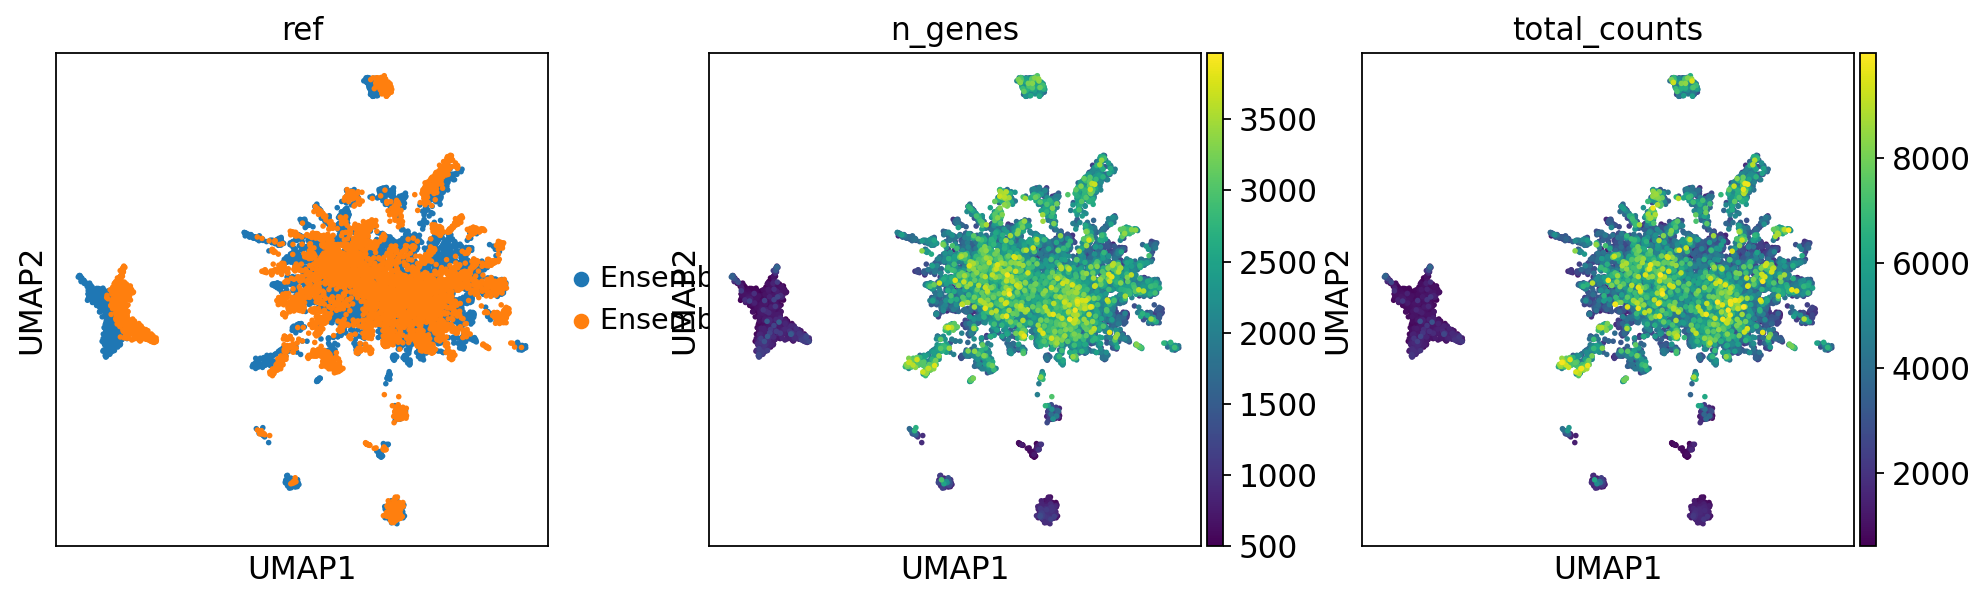

In [175]:
sc.pp.neighbors(adata_merge_test, n_neighbors=15, n_pcs=40,use_rep='X_pca_harmony')
sc.tl.umap(adata_merge_test)
sc.pl.umap(adata_merge_test, color=['ref','n_genes', 'total_counts'], 
           use_raw=False, s=25,save = '_merge_batch_test_1.pdf')